In [1]:
#lIBRARY TO SUPPRESS WARNINGS
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd   #Scientfic Computing
import numpy as np    #Data Analysis
import matplotlib.pyplot as plt  #Plotting
import seaborn as sns #Statistical Data Visualization

## Read the dataset(WorldCupMatches.csv, WorldCupPlayers.csv, WorldCups.csv) 

In [3]:
Matches = pd.read_csv(r"E:\Access Bank Data Science Programme\MIT Data Science\Data Science\WorldCupMatches.csv")
Players = pd.read_csv(r"E:\Access Bank Data Science Programme\MIT Data Science\Data Science\WorldCupPlayers.csv")
Cups = pd.read_csv(r"E:\Access Bank Data Science Programme\MIT Data Science\Data Science\WorldCups.csv")

* Checking first elements of the DataFrame with .head() method
* After you run the code above, nothing will appear. 
* So you have to write df to see your data. But instead of seeing all the data, we are going to use the “.head()” method to see * The first five elements of the data. 
* Before you run the read_csv code, you can write df.head() below. So it’s going to be like this:

<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#0ab6fa">3. Data Analysis and Preparation
    
    
    
1. Check dimensions of the dataframe in terms of rows and columns
2. Check data types. Ensure your data types are correct. Refer data definitions to validate
3. If data types are not as per business definition, change the data types as per requirement
4. Study summary statistics
5. Check for missing values
6. Study correlation
7. Detect outliers

Note: it is an art to explore data and one will need more and more practice to gain expertise in this area


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0ab6fa">3.1 Understanding the Dataset

In [12]:
Matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [14]:
Players.head(7)

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN
5,201,1096,MEX,LUQUE Juan (MEX),S,0,Rafael GARZA,C,NaN
6,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Andre MASCHINOT,NaN,G43' G87'


In [16]:
Cups.tail()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
15,1998,France,France,Brazil,Croatia,Netherlands,171,32,64,2.785.100
16,2002,Korea/Japan,Brazil,Germany,Turkey,Korea Republic,161,32,64,2.705.197
17,2006,Germany,Italy,France,Germany,Portugal,147,32,64,3.359.439
18,2010,South Africa,Spain,Netherlands,Germany,Uruguay,145,32,64,3.178.856
19,2014,Brazil,Germany,Argentina,Netherlands,Brazil,171,32,64,3.386.810


In [17]:
# display the dimension of the data
print(Cups.shape)
print(Players.shape)
print(Matches.shape)

(20, 10)
(37784, 9)
(4572, 20)


* We see the dataframe has 10 columns and 20 observations.


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0ab6fa">3.1.1 Data Types
    
    
* The main data types in Pandas dataframes are object, float, int64, bool and datetime64. In order to understand each attribute of our data, it is always good for us to know the data type of each column

##### .info() method
*This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage

In [18]:
Players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37784 entries, 0 to 37783
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   RoundID        37784 non-null  int64 
 1   MatchID        37784 non-null  int64 
 2   Team Initials  37784 non-null  object
 3   Coach Name     37784 non-null  object
 4   Line-up        37784 non-null  object
 5   Shirt Number   37784 non-null  int64 
 6   Player Name    37784 non-null  object
 7   Position       4143 non-null   object
 8   Event          9069 non-null   object
dtypes: int64(3), object(6)
memory usage: 2.6+ MB


#### We can also see the data types of columns with .dtypes

In [21]:
Matches.dtypes

Year                    float64
Datetime                 object
Stage                    object
Stadium                  object
City                     object
Home Team Name           object
Home Team Goals         float64
Away Team Goals         float64
Away Team Name           object
Win conditions           object
Attendance              float64
Half-time Home Goals    float64
Half-time Away Goals    float64
Referee                  object
Assistant 1              object
Assistant 2              object
RoundID                 float64
MatchID                 float64
Home Team Initials       object
Away Team Initials       object
dtype: object

In [22]:
Cups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            20 non-null     int64 
 1   Country         20 non-null     object
 2   Winner          20 non-null     object
 3   Runners-Up      20 non-null     object
 4   Third           20 non-null     object
 5   Fourth          20 non-null     object
 6   GoalsScored     20 non-null     int64 
 7   QualifiedTeams  20 non-null     int64 
 8   MatchesPlayed   20 non-null     int64 
 9   Attendance      20 non-null     object
dtypes: int64(4), object(6)
memory usage: 1.7+ KB


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0ab6fa">3.1.2 Summary Statistics


##### .describe() method

* This method is used to get a summary of numeric values in your dataset. 
* It calculates the mean, standard deviation, minimum value, maximum value, 1st percentile, 2nd percentile, 3rd percentile of the columns with numeric values. 
* It also counts the number of variables in the dataset. 

In [25]:
Matches.describe()

,Year,Home Team Goals,Away Team Goals,Attendance,Half-time Home Goals,Half-time Away Goals,RoundID,MatchID
count,852.000000,852.000000,852.000000,850.000000,852.000000,852.000000,8.520000e+02,8.520000e+02
mean,1985.089202,1.811033,1.022300,45164.800000,0.708920,0.428404,1.066177e+07,6.134687e+07
std,22.448825,1.610255,1.087573,23485.249247,0.937414,0.691252,2.729613e+07,1.110572e+08
min,1930.000000,0.000000,0.000000,2000.000000,0.000000,0.000000,2.010000e+02,2.500000e+01
25%,1970.000000,1.000000,0.000000,30000.000000,0.000000,0.000000,2.620000e+02,1.188750e+03
50%,1990.000000,2.000000,1.000000,41579.500000,0.000000,0.000000,3.370000e+02,2.191000e+03
75%,2002.000000,3.000000,2.000000,61374.500000,1.000000,1.000000,2.497220e+05,4.395006e+07
max,2014.000000,10.000000,7.000000,173850.000000,6.000000,5.000000,9.741060e+07,3.001865e+08


In [26]:
Players.describe()

,RoundID,MatchID,Shirt Number
count,3.778400e+04,3.778400e+04,37784.000000
mean,1.105647e+07,6.362233e+07,10.726022
std,2.770144e+07,1.123916e+08,6.960138
min,2.010000e+02,2.500000e+01,0.000000
25%,2.630000e+02,1.199000e+03,5.000000
50%,3.370000e+02,2.216000e+03,11.000000
75%,2.559310e+05,9.741000e+07,17.000000
max,9.741060e+07,3.001865e+08,23.000000


In [27]:
Cups.describe()

,Year,GoalsScored,QualifiedTeams,MatchesPlayed
count,20.000000,20.000000,20.000000,20.000000
mean,1974.800000,118.950000,21.250000,41.800000
std,25.582889,32.972836,7.268352,17.218717
min,1930.000000,70.000000,13.000000,17.000000
25%,1957.000000,89.000000,16.000000,30.500000
50%,1976.000000,120.500000,16.000000,38.000000
75%,1995.000000,145.250000,26.000000,55.000000
max,2014.000000,171.000000,32.000000,64.000000


In [29]:
# describe the categorical data
Cups.describe(include=object)
# Note: If we do not pass include=object to the describe(), it would return statistics for numeric variable

,Country,Winner,Runners-Up,Third,Fourth,Attendance
count,20,20,20,20,20,20
unique,15,9,10,14,16,20
top,Italy,Brazil,Argentina,Germany,Uruguay,590.549
freq,2,5,3,3,3,1


In [30]:
# describe the categorical data
Matches.describe(include=object)

,Datetime,Stage,Stadium,City,Home Team Name,Away Team Name,Win conditions,Referee,Assistant 1,Assistant 2,Home Team Initials,Away Team Initials
count,852,852,852,852,852,852,852,852,852,852,852,852
unique,602,23,181,151,78,83,43,366,387,408,77,82
top,27 May 1934 - 16:30,Round of 16,Estadio Azteca,Mexico City,Brazil,Mexico,,Ravshan IRMATOV (UZB),ACHIK Redouane (MAR),KOCHKAROV Bakhadyr (KGZ),BRA,MEX
freq,8,72,19,23,82,38,787,10,7,10,82,38


In [31]:
# describe the categorical data
Players.describe(include=object)

,Team Initials,Coach Name,Line-up,Player Name,Position,Event
count,37784,37784,37784,37784,4143,9069
unique,82,335,2,7663,3,1893
top,BRA,SCOLARI Luiz Felipe (BRA),N,RONALDO,GK,OH46'
freq,2403,575,19040,33,2441,247


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0ab6fa">3.1.3 Missing Values
    

**If we encounter with missing data, what we can do:**

* leave as is
* drop them with dropna()
* fill missing value with fillna()
* fill missing values with test statistics like mean




* One of the most common problems in data science is missing values. 
* To detect them, there is a beautiful method which is called .isnull(). With this method, we can get a boolean series (True or False). 

In [33]:
Cups.isnull().sum()

Year              0
Country           0
Winner            0
Runners-Up        0
Third             0
Fourth            0
GoalsScored       0
QualifiedTeams    0
MatchesPlayed     0
Attendance        0
dtype: int64

In [34]:
Matches.isnull().sum()

Year                    3720
Datetime                3720
Stage                   3720
Stadium                 3720
City                    3720
Home Team Name          3720
Home Team Goals         3720
Away Team Goals         3720
Away Team Name          3720
Win conditions          3720
Attendance              3722
Half-time Home Goals    3720
Half-time Away Goals    3720
Referee                 3720
Assistant 1             3720
Assistant 2             3720
RoundID                 3720
MatchID                 3720
Home Team Initials      3720
Away Team Initials      3720
dtype: int64

In [35]:
Players.isnull().sum()

RoundID              0
MatchID              0
Team Initials        0
Coach Name           0
Line-up              0
Shirt Number         0
Player Name          0
Position         33641
Event            28715
dtype: int64

GK     2441
C      1510
GKC     192
Name: Position, dtype: int64

In [ ]:
def missing(players):
    print (round((Players.isnull().sum() * 100/ len(Players)),2).sort_values(ascending=False))

missing(Players)

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0ab6fa">3.1.3A) Mode imputation for "Position" and "Event"
    
* Mode imputation means replacing missing values by the mode, or the most frequent- category value.
* The results of this imputation will look like this:

In [39]:
Players["Position"].value_counts()

GK     2441
C      1510
GKC     192
Name: Position, dtype: int64

* The variable Position and Event column has empty cells we are replacing with NaN

In [45]:
Players['Position'].replace(' ',np.NaN).head()

0     GK
1     GK
2    NaN
3    NaN
4    NaN
Name: Position, dtype: object

In [48]:
df = Players['Position'].value_counts().index[0]

'GK'

In [50]:
Players['Position'].fillna(df,inplace=True)
Players["Position"].head()

0    GK
1    GK
2    GK
3    GK
4    GK
Name: Position, dtype: object

In [51]:
df1 = Players['Event'].value_counts().index[0]
Players['Event'].fillna(df1,inplace=True)
Players["Event"].head(2)

0    OH46'
1    OH46'
Name: Event, dtype: object

In [53]:
def missing(Players):
    print (round((Players.isnull().sum() * 100/ len(Players)),2).sort_values(ascending=False))

missing(Players)

RoundID          0.0
MatchID          0.0
Team Initials    0.0
Coach Name       0.0
Line-up          0.0
Shirt Number     0.0
Player Name      0.0
Position         0.0
Event            0.0
dtype: float64


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0ab6fa">3.1.3B) Mean and Median imputation for Matches dataset

**For numerical variables we use mean/ median**

* Mean as a measure is greatly affected by outliers or if the distribution of the data or column is not normally-distributed. Therefore, it’s wise to first check the distribution of the column before deciding if to use a mean imputation or median imputation

* Mean imputation works better if the distribution is normally-distributed or has a Gaussian distribution, while median imputation is preferable for skewed distribution(be it right or left)

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0ab6fa">3.1.4 Correlation

* Correlation is a statistic that measures the degree to which two variables move in relation to each other. A positive correlation indicates
* the extent to which those variables increase or decrease in parallel; a negative correlation indicates the extent to which one variable
* increases as the other decreases. Correction among multiple variables can be represented in the form of a matrix. This allows us to see which pairs have the high correlations.
* correlation Correlation is a mutual relationship or connection between two or more things. It takes a value between (+1) and (-1)
* One important note here; Correlation can be created between integer values, so columns come with string values will not be included.

In [67]:
Cups_corr = Cups.corr()
Cups_corr

,Year,GoalsScored,QualifiedTeams,MatchesPlayed
Year,1.000000,0.829886,0.895565,0.972473
GoalsScored,0.829886,1.000000,0.866201,0.876201
QualifiedTeams,0.895565,0.866201,1.000000,0.949164
MatchesPlayed,0.972473,0.876201,0.949164,1.000000


In [65]:
Players_corr = Players.corr()
Players_corr 

,RoundID,MatchID,Shirt Number
RoundID,1.000000,0.064068,0.072988
MatchID,0.064068,1.000000,0.103669
Shirt Number,0.072988,0.103669,1.000000


In [66]:
Matches_corr = Matches.corr()

Matches_corr

,Year,Home Team Goals,Away Team Goals,Attendance,Half-time Home Goals,Half-time Away Goals,RoundID,MatchID
Year,1.000000,-0.381332,0.075339,0.314698,-0.288909,0.020934,0.343106,0.636591
Home Team Goals,-0.381332,1.000000,0.012474,-0.117751,0.729536,-0.009530,-0.110075,-0.196100
Away Team Goals,0.075339,0.012474,1.000000,-0.029801,-0.006304,0.693780,-0.005345,0.082687
Attendance,0.314698,-0.117751,-0.029801,1.000000,-0.126756,-0.037136,0.069394,0.164686
Half-time Home Goals,-0.288909,0.729536,-0.006304,-0.126756,1.000000,0.022204,-0.055303,-0.166201
Half-time Away Goals,0.020934,-0.009530,0.693780,-0.037136,0.022204,1.000000,0.011980,0.059456
RoundID,0.343106,-0.110075,-0.005345,0.069394,-0.055303,0.011980,1.000000,0.071549
MatchID,0.636591,-0.196100,0.082687,0.164686,-0.166201,0.059456,0.071549,1.000000


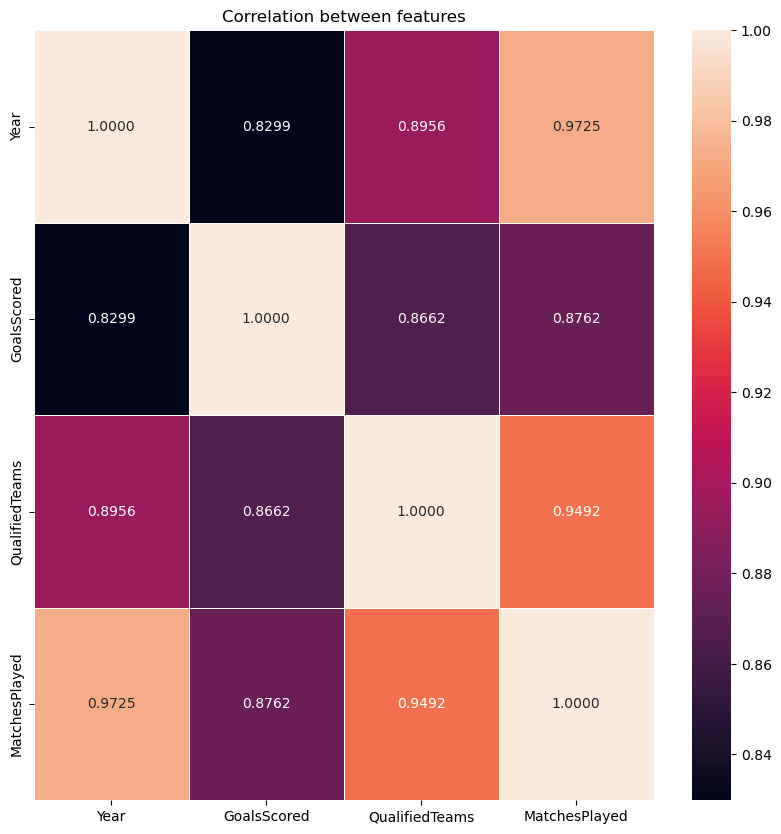

In [6]:
# To get a correlation matrix
# Ploting correlation plot
f,ax = plt.subplots(figsize=(10, 10))

# plotting the heat map
# corr: give the correlation matrix
# cmap: colour code used for plotting
# vmax: gives maximum range of values for the chart
# vmin: gives minimum range of values for the chart
# annot: prints the correlation values in the chart
# annot_kws={"size": 12}): Sets the font size of the annotation

sns.heatmap(Cups.corr(), annot=True, linewidths=.5, fmt= '.4f',ax=ax)
# specify name of the plot
plt.title('Correlation between features')
plt.show()

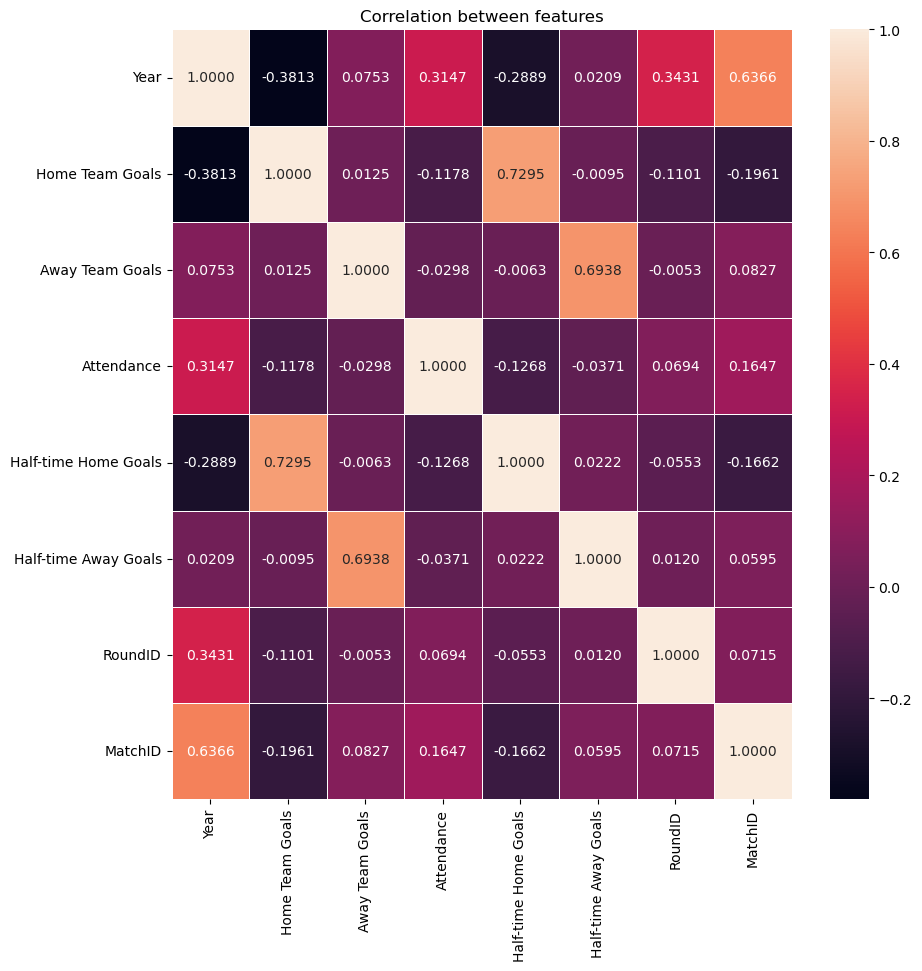

In [7]:
# To get a correlation matrix
# Ploting correlation plot
f,ax = plt.subplots(figsize=(10, 10))

# plotting the heat map
# corr: give the correlation matrix
# cmap: colour code used for plotting
# vmax: gives maximum range of values for the chart
# vmin: gives minimum range of values for the chart
# annot: prints the correlation values in the chart
# annot_kws={"size": 12}): Sets the font size of the annotation

sns.heatmap(Matches.corr(), annot=True, linewidths=.5, fmt= '.4f',ax=ax)
# specify name of the plot
plt.title('Correlation between features')
plt.show()

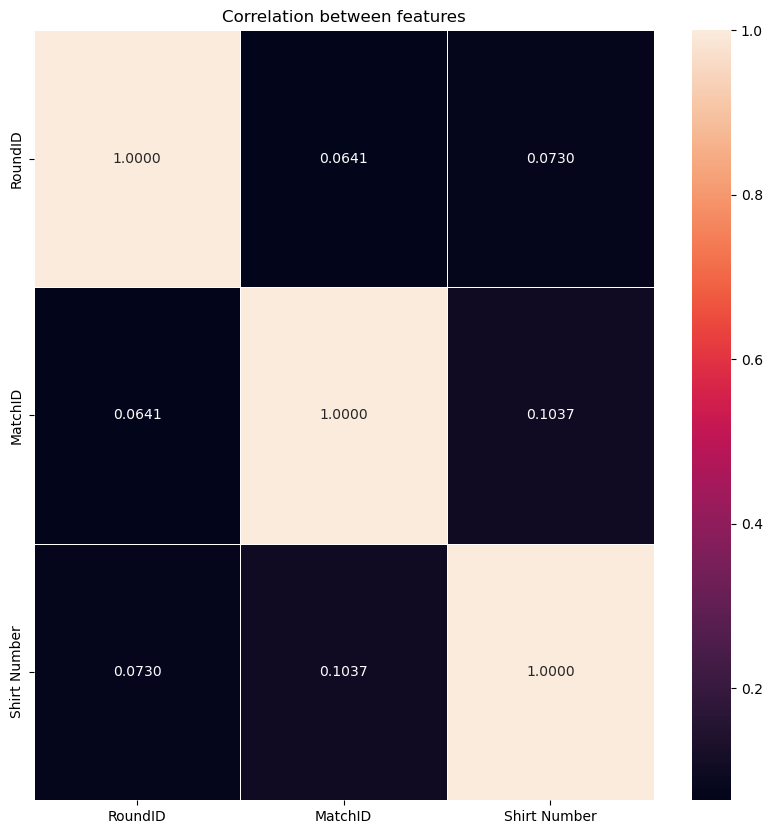

In [8]:
# To get a correlation matrix
# Ploting correlation plot
f,ax = plt.subplots(figsize=(10, 10))

# plotting the heat map
# corr: give the correlation matrix
# cmap: colour code used for plotting
# vmax: gives maximum range of values for the chart
# vmin: gives minimum range of values for the chart
# annot: prints the correlation values in the chart
# annot_kws={"size": 12}): Sets the font size of the annotation

sns.heatmap(Players.corr(), annot=True, linewidths=.5, fmt= '.4f',ax=ax)
# specify name of the plot
plt.title('Correlation between features')
plt.show()

* As we can see in the correlation heatmap, most of our variables such as MatchesPlayed and Year are nearly positively correlated.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0ab6fa">3.1.5 Discover Outliers with Visualization

**Importance of detecting an outlier**

* One of the most important tasks from large data sets is to find an outlier, which is defined as a sample or event that is very inconsistent with the rest of the data set. The observation point or value would be distant from the other observations in the data set.

**outliers:** the value that is considerably higher or lower from rest of the data

* Lets say value at 75% is Q3 and value at 25% is Q1.
* Outliers are smaller than Q1 - 1.5(Q3-Q1) and bigger than Q3 + 1.5(Q3-Q1). (Q3-Q1) = IQR
* We will use describe() method. Describe method includes:
* count: number of entries
* mean: average of entries
* std: standard deviation
* min: minimum entry
* 25%: first quantile
* 50%: median or second quantile
* 75%: third quantile
* max: maximum entry

#### What is quantile?

* 1,4,5,6,8,9,11,12,13,14,15,16,17
* The median is the number that is in middle of the sequence. In this case it would be 11.
* The lower quartile is the median in between the smallest number and the median i.e. in between 1 and 11, which is 6.
* The upper quartile, you find the median between the median and the largest number i.e. between 11 and 17, which will be 14 * according to the question above.

* If the sequence has an even number of elements, then median is equal to mean of the numbers beside median.

* i.e. Let's suppose 1,4,6,8 is our sequence. Median should be 2.5 between 4 and 6.
Then median of this sequence is (4+6)/2 = 5.


#### Box plot-


* In descriptive statistics, a box plot is a method for graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending vertically from the boxes (whiskers) indicating variability outside the upper and lower quartiles, hence the terms box-and-whisker plot and box-and-whisker diagram. Outliers may be plotted as individual points.

<Axes: title={'center': 'Home Team Goals'}, xlabel='Away Team Goals'>

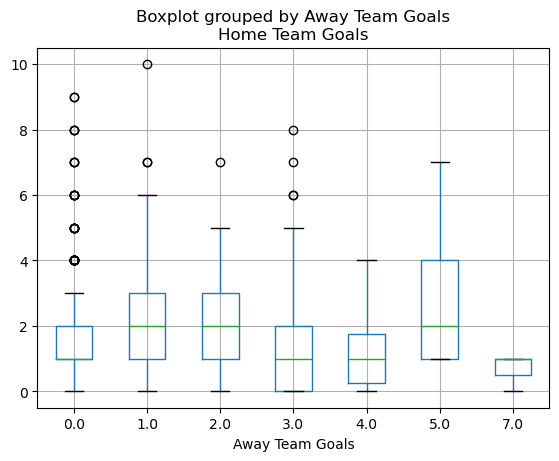

In [10]:
Matches.boxplot(column='Home Team Goals',by = 'Away Team Goals')

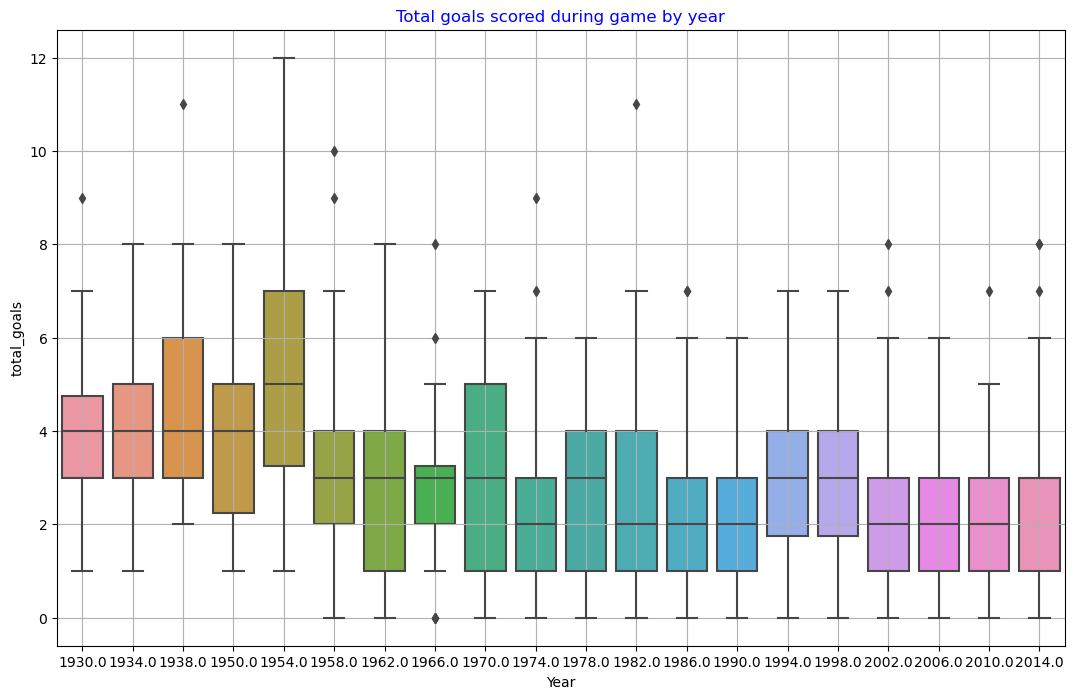

In [11]:
Matches["total_goals"] = Matches["Home Team Goals"] + Matches["Away Team Goals"]

plt.figure(figsize=(13,8))
sns.boxplot(y=Matches["total_goals"],
            x=Matches["Year"])
plt.grid(True)
plt.title("Total goals scored during game by year",color='b')
plt.show()

In [12]:
Q1 = Matches.quantile(0.25)
Q3 = Matches.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Year                          32.0
Home Team Goals                2.0
Away Team Goals                2.0
Attendance                 31374.5
Half-time Home Goals           1.0
Half-time Away Goals           1.0
RoundID                   249460.0
MatchID                 43948870.5
total_goals                    3.0
dtype: float64


In [13]:
Matches = Matches[~((Matches < (Q1 - 1.5 * IQR)) |(Matches > (Q3 + 1.5 * IQR))).any(axis=1)]

<Axes: title={'center': 'Home Team Goals'}, xlabel='Away Team Goals'>

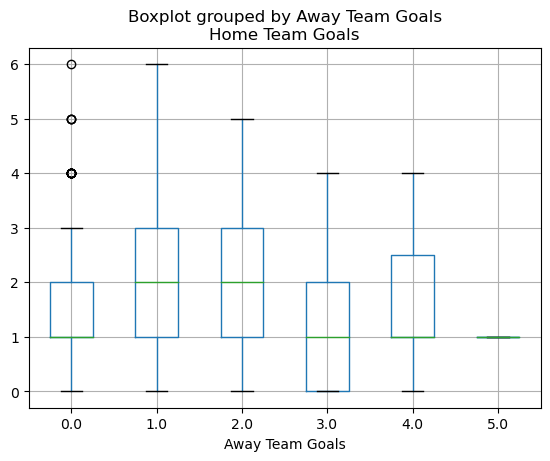

In [14]:
Matches.boxplot(column='Home Team Goals',by = 'Away Team Goals')

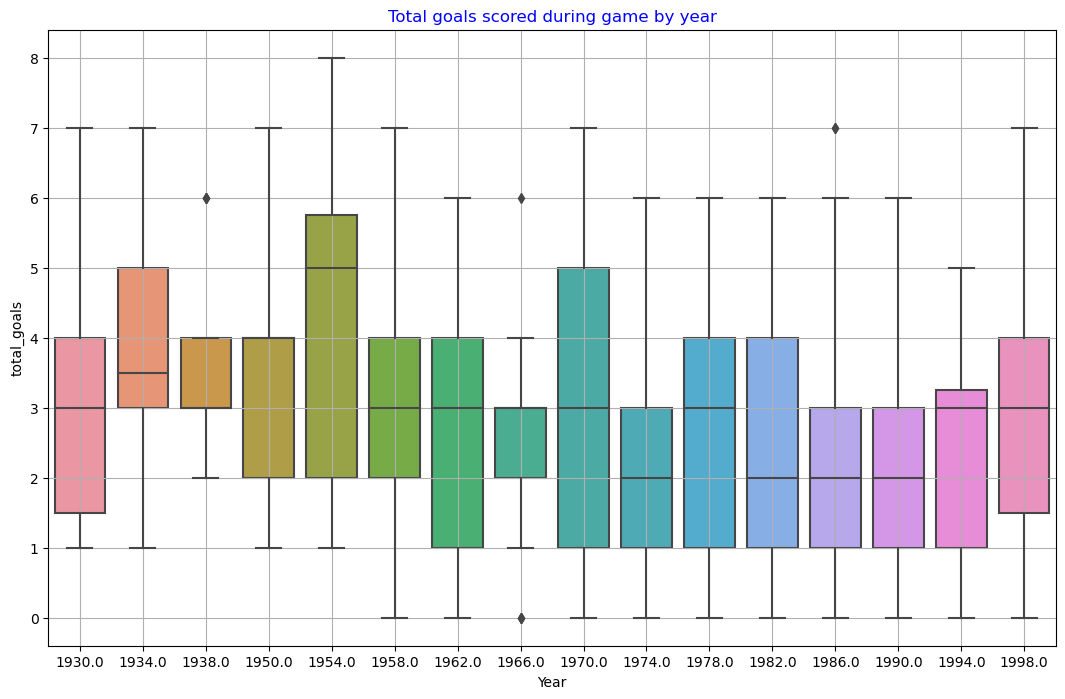

In [15]:
Matches["total_goals"] = Matches["Home Team Goals"] + Matches["Away Team Goals"]

plt.figure(figsize=(13,8))
sns.boxplot(y=Matches["total_goals"],
            x=Matches["Year"])
plt.grid(True)
plt.title("Total goals scored during game by year",color='b')
plt.show()

* Here we can see few outliers are removed

<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#0ab6fa">3.2.COMPARING TWO DATA VISUALIZATION TOOLS: MATPLOTLIB VS SEABORN
    
<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#0ab6fa">3.2.1.Functionality:
    
**Matplotlib:** Matplotlib is mainly deployed for basic plotting. Visualization using Matplotlib generally consists of bars, pies, lines, scatter plots and so on.

**Seaborn:** Seaborn, on the other hand, provides a variety of visualization patterns. It uses fewer syntax and has easily interesting default themes. It specializes in statistics visualization and is used if one has to summarize data in visualizations and also show the distribution in the data.
    
<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#0ab6fa">3.2. 2.Handling Multiple Figures:
    
    
**Matplotlib:** Matplotlib has multiple figures can be opened, but need to be closed explicitly. plt.close() only closes the current figure. plt.close(‘all’) would close them all.
    
**Seaborn:** Seaborn automates the creation of multiple figures. This sometimes leads to OOM (out of memory) issues.
    
<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#0ab6fa">3.2.3.Visualization:
    
**Matplotlib:** Matplotlib is a graphics package for data visualization in Python. It is well integrated with NumPy and Pandas. The pyplot module mirrors the MATLAB plotting commands closely. Hence, MATLAB users can easily transit to plotting with Python.

**Seaborn:** Seaborn is more integrated for working with Pandas data frames. It extends the Matplotlib library for creating beautiful graphics with Python using a more straightforward set of methods.
    
<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#0ab6fa">3.2.4.Data frames and Arrays:
    
**Matplotlib:** Matplotlib works with data frames and arrays. It has different stateful APIs for plotting. The figures and aces are represented by the object and therefore plot() like calls without parameters suffices, without having to manage parameters.

**Seaborn:** Seaborn works with the dataset as a whole and is much more intuitive than Matplotlib. For Seaborn, replot() is the entry API with ‘kind’ parameter to specify the type of plot which could be line, bar, or many of the other types. Seaborn is not stateful. Hence, plot() would require passing the object.
    
<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#0ab6fa">3.2.5.Flexibility:
**Matplotlib:** Matplotlib is highly customizable and powerful.

**Seaborn:** Seaborn avoids a ton of boilerplate by providing default themes which are commonly used.

<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#0ab6fa">3.2.6.Use Cases:
    
**Matplotlib:** Pandas uses Matplotlib. It is a neat wrapper around Matplotlib.

**Seaborn:** Seaborn is for more specific use cases. Also, it is Matplotlib under the hood. It is specially meant for statistical plotting.

<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#0ab6fa">4. Univariate analysis

* Univariate analysis is the simplest form of analyzing data. 
* “Uni” means “one”, so in other words your data has only one variable. 
* It doesn’t deal with causes or relationships (unlike regression) and it’s major purpose is to describe; it takes data, summarizes that data and finds patterns in the data.

<Axes: xlabel='Year', ylabel='Density'>

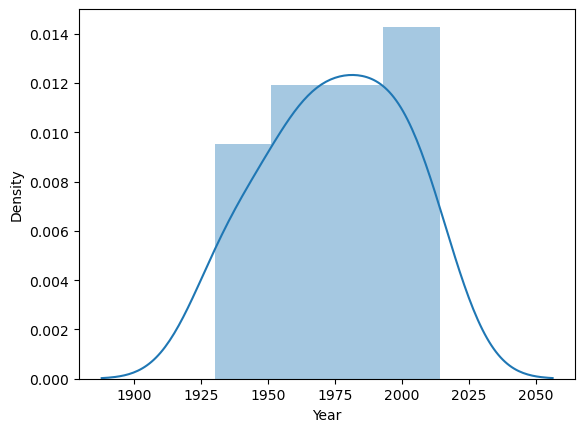

In [17]:
sns.distplot(Cups.Year)

In [18]:
plt.figure(figsize=(13, 4))
sns.countplot(Cups.Country, order = Cups.Country.value_counts().index);

ValueError: Input data must be a pandas object to reorder

<Figure size 1300x400 with 0 Axes>

<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#0ab6fa">4.1.Bivariate Analysis

* Data in statistics is sometimes classified according to how many variables are in a particular study. 
* For example, “height” might be one variable and “weight” might be another variable. 
* Depending on the number of variables being looked at, the data might be univariate, or it might be bivariate.

<Figure size 1400x1400 with 0 Axes>

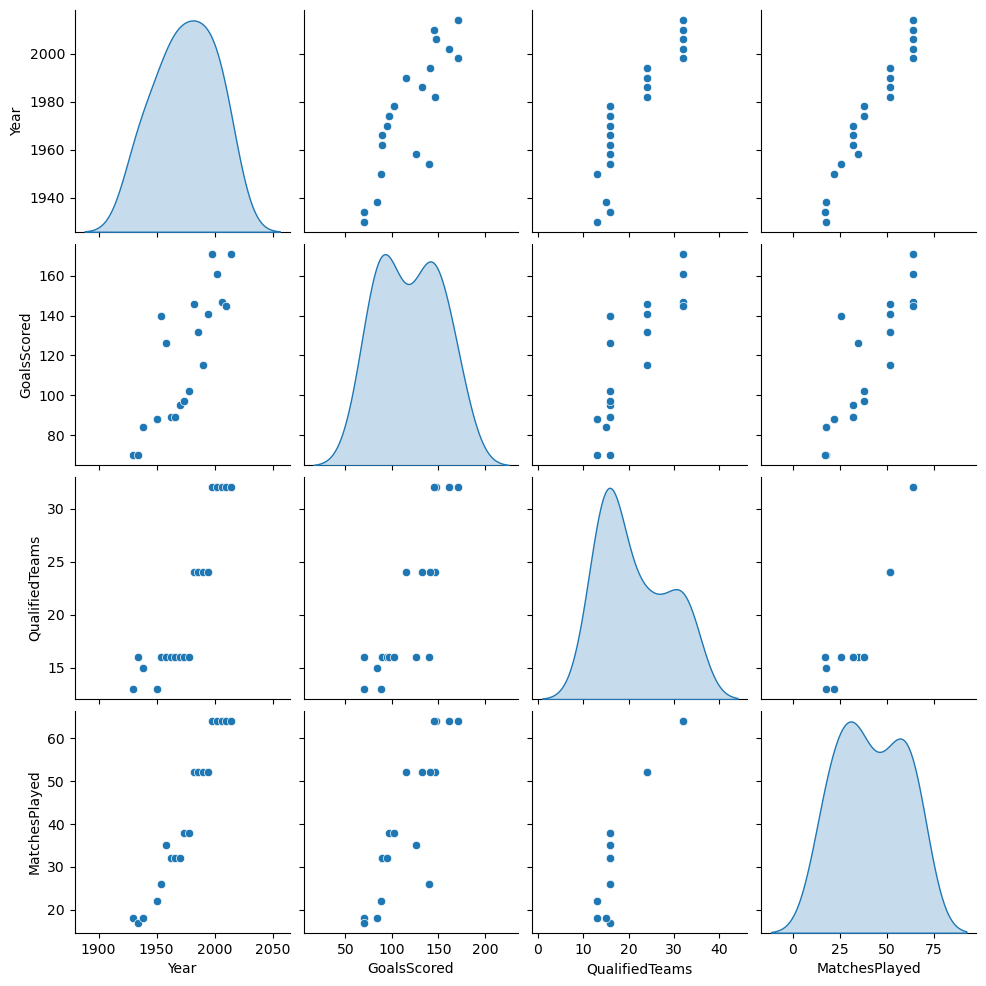

In [20]:
plt.figure(figsize=(14, 14))

sns.pairplot(Cups, diag_kind='kde');


#### Scatter Plot
*We can also make a scatter plot of two variables to see the correlation better.

##### We can also make a scatter plot of two variables to see the correlation better.

In [14]:
Cups['Average_Goal']=Cups.GoalsScored/Cups.MatchesPlayed

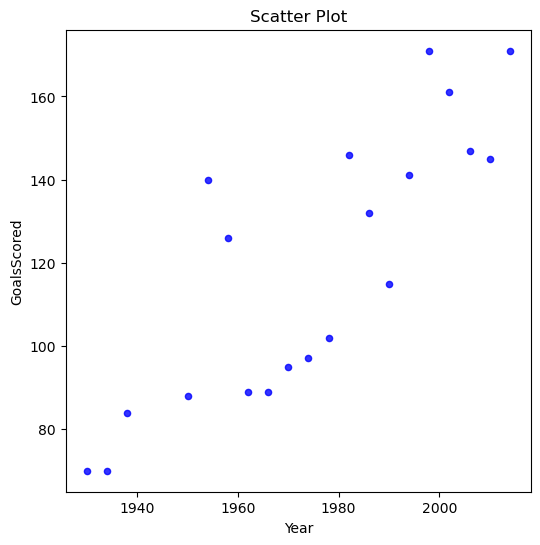

In [23]:
Cups.plot(kind='scatter', x='Year', y="GoalsScored",alpha = .8,color = 'blue',figsize= (6,6))
plt.xlabel('Year')             
plt.ylabel("GoalsScored")
plt.title('Scatter Plot') 
plt.show()

###  Line Plot

* Now, it is easier to see the fact that although Year and GoalsScored variables are positively correlated, there is a negative correlation between Year and AverageGoal.

* This contradiction shows us that as the years passed, teams have not began to score more goals in a single match.

* Now it is easier to understand why GoalsScored has been increasing from 1930 so far. Let's prepare a line plot for different variables.

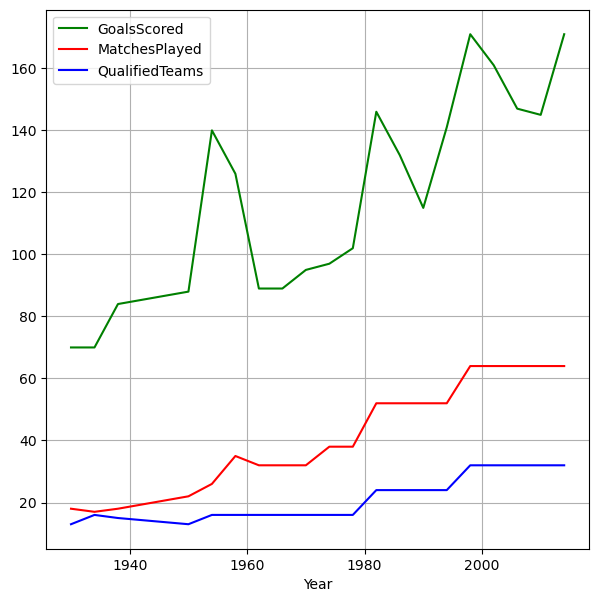

In [24]:
ax = plt.gca()

Cups.plot(kind='line', x = "Year",y = "GoalsScored", color = "green", ax=ax,grid = True,figsize = (7,7))
Cups.plot(kind='line', x = "Year",y = "MatchesPlayed", color = 'red', ax=ax,grid = True)
Cups.plot(kind='line', x = "Year",y = "QualifiedTeams", color = 'b', ax=ax,grid = True)
plt.legend(loc = "upper left")
plt.show()


* On the line plot above, we can see that increase in GoalsScored is a result of MatchesPlayed.

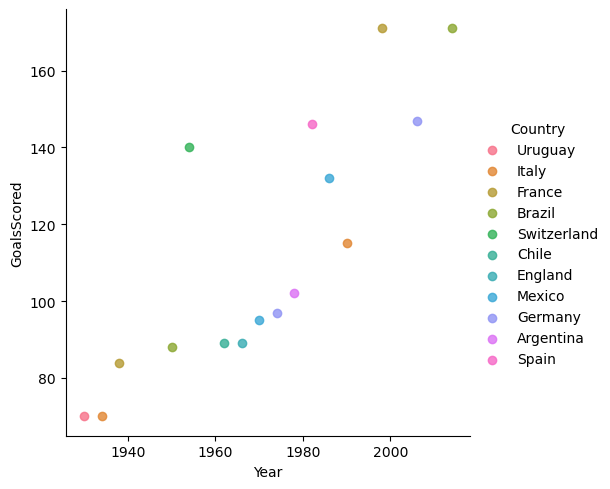

In [77]:
import seaborn as sns

sns.lmplot(x='Year', y='GoalsScored', hue='Country', 
           data=Cups.loc[Cups['Country'].isin(['Uruguay', 'Italy', 'France', 'Brazil', 'Switzerland', 'Chile', 'England', 'Mexico', 'Germany', 'Argentina', 'Spain', 'Mexico'])], 
           fit_reg=False)

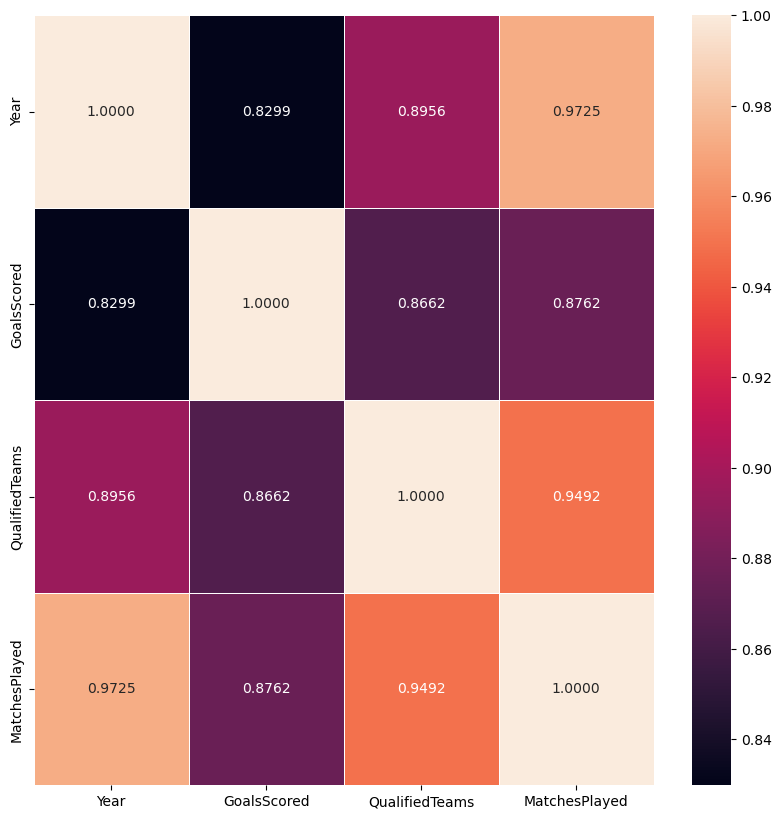

In [5]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(Cups.corr(), annot=True, linewidths=.5, fmt= '.4f',ax=ax)
plt.show()

<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#0ab6fa">5. Important functions for data Cleaning

## 1.Filters|

In [9]:
Cups[np.logical_and(Cups['GoalsScored']>100, Cups['Year']>1930 )]

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607
5,1958,Sweden,Brazil,Sweden,France,Germany FR,126,16,35,819.810
10,1978,Argentina,Argentina,Netherlands,Brazil,Italy,102,16,38,1.545.791
11,1982,Spain,Italy,Germany FR,Poland,France,146,24,52,2.109.723
12,1986,Mexico,Argentina,Germany FR,France,Belgium,132,24,52,2.394.031
13,1990,Italy,Germany FR,Argentina,Italy,England,115,24,52,2.516.215
14,1994,USA,Brazil,Italy,Sweden,Bulgaria,141,24,52,3.587.538
15,1998,France,France,Brazil,Croatia,Netherlands,171,32,64,2.785.100
16,2002,Korea/Japan,Brazil,Germany,Turkey,Korea Republic,161,32,64,2.705.197
17,2006,Germany,Italy,France,Germany,Portugal,147,32,64,3.359.439


### 2. User defined functions:

In [17]:
def cup(count=6):
    """returns a list of top (count) cups that finished with the highest amount of goals (default:5)"""
    ecg=Cups.sort_values(by=['GoalsScored'],ascending=False).head(count)
    return ecg
cup()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance,Average_Goal
19,2014,Brazil,Germany,Argentina,Netherlands,Brazil,171,32,64,3.386.810,2.671875
15,1998,France,France,Brazil,Croatia,Netherlands,171,32,64,2.785.100,2.671875
16,2002,Korea/Japan,Brazil,Germany,Turkey,Korea Republic,161,32,64,2.705.197,2.515625
17,2006,Germany,Italy,France,Germany,Portugal,147,32,64,3.359.439,2.296875
11,1982,Spain,Italy,Germany FR,Poland,France,146,24,52,2.109.723,2.807692
18,2010,South Africa,Spain,Netherlands,Germany,Uruguay,145,32,64,3.178.856,2.265625


### 3. Nested Functions:

In [33]:
def goals(country=16):
    Country = Cups.at[country-1, 'Country']
    year = Cups.at[country-1, 'Year']
    goals = Cups.at[country-1, 'GoalsScored']
    matches= Cups.at[country-1, 'MatchesPlayed']
    def AvgGoals(goals, matches):
        avg=goals/matches
        return avg
    print(Country, year)
    print("Average goal per match:",AvgGoals(goals,matches))
goals()

France 1998
Average goal per match: 2.671875


### 4. *args ve **kwargs:

In [42]:
def ulkeler(*args):
    for i in args:
        print(i)
countries=tuple(Cups.iloc[:, Cups.columns.get_loc('Country')])
ulkeler(countries)

dict=Cups.set_index('Country').to_dict()['Winner']
def f(**kwargs):
    for key, value in kwargs.items():
        print(key, " ", value)
    
f(**dict)

('Uruguay', 'Italy', 'France', 'Brazil', 'Switzerland', 'Sweden', 'Chile', 'England', 'Mexico', 'Germany', 'Argentina', 'Spain', 'Mexico', 'Italy', 'USA', 'France', 'Korea/Japan', 'Germany', 'South Africa', 'Brazil')
Uruguay   Uruguay
Italy   Germany FR
France   France
Brazil   Germany
Switzerland   Germany FR
Sweden   Brazil
Chile   Brazil
England   England
Mexico   Argentina
Germany   Italy
Argentina   Argentina
Spain   Italy
USA   Brazil
Korea/Japan   Brazil
South Africa   Spain


#### cleaning data and make it more usable and readable 
#### we will learn more about cleaning at below...

In [45]:
Cups.Attendance = Cups.Attendance.astype(str)
Cups.Attendance = [c.replace('.', '') for c in Cups.Attendance]
Cups.Attendance = Cups.Attendance.astype(int)

### 5. Removing spaces and hyphens.

In [48]:
Matches.columns = [c.replace(' ', '') for c in Matches.columns]
Matches.columns = [c.replace('-', '') for c in Matches.columns]
Matches.columns

Index(['Year', 'Datetime', 'Stage', 'Stadium', 'City', 'HomeTeamName',
       'HomeTeamGoals', 'AwayTeamGoals', 'AwayTeamName', 'Winconditions',
       'Attendance', 'HalftimeHomeGoals', 'HalftimeAwayGoals', 'Referee',
       'Assistant1', 'Assistant2', 'RoundID', 'MatchID', 'HomeTeamInitials',
       'AwayTeamInitials'],
      dtype='object')

### 6. Multiindex

In [52]:
cups_data1 = Cups.copy()
cups_data1.head(2)

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance,Average_Goal
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549,3.888889
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000,4.117647


In [50]:
cups_data = cups_data1.set_index(["Country","Winner"])
cups_data.head(4)

,,Year,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance,Average_Goal
Country,Winner,,,,,,,,,
Uruguay,Uruguay,1930,Argentina,USA,Yugoslavia,70,13,18,590549,3.888889
Italy,Italy,1934,Czechoslovakia,Germany,Austria,70,16,17,363000,4.117647
France,Italy,1938,Hungary,Brazil,Sweden,84,15,18,375700,4.666667
Brazil,Uruguay,1950,Brazil,Sweden,Spain,88,13,22,1045246,4.000000


### 7.Transforming data and list comprehension:

In [60]:
cups_data1["GoalMean"]=[round(cups_data1.GoalsScored[i]/cups_data1.MatchesPlayed[i],2) for i in range(len(cups_data1.GoalsScored))]
cups_data1.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance,Average_Goal,GoalMean
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549,3.888889,3.89
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000,4.117647,4.12
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375700,4.666667,4.67
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1045246,4.000000,4.00
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768607,5.384615,5.38


### 8. Index object:

In [64]:
print(cups_data1.index.name)
cups_data1.index.name="IndexName"
cups_data1.head(3)

IndexName


,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance,Average_Goal,GoalMean
IndexName,,,,,,,,,,,,
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549,3.888889,3.89
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000,4.117647,4.12
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375700,4.666667,4.67


### 9. Setting index : type 1 is outer type 2 is inner index:

In [66]:
cups_data2 = cups_data1.set_index(["Winner","Year"]) 
cups_data2.head(3)

Country      Runners-Up    Third      Fourth  GoalsScored  \
Winner  Year                                                              
Uruguay 1930  Uruguay       Argentina      USA  Yugoslavia           70   
Italy   1934    Italy  Czechoslovakia  Germany     Austria           70   
        1938   France         Hungary   Brazil      Sweden           84   

              QualifiedTeams  MatchesPlayed Attendance  Average_Goal  GoalMean  
Winner  Year                                                                    
Uruguay 1930              13             18     590549      3.888889      3.89  
Italy   1934              16             17     363000      4.117647      4.12  
        1938              15             18     375700      4.666667      4.67

In [67]:
cups_data3=cups_data1.set_index(["Winner","GoalMean"])
cups_data3.head()

Year      Country      Runners-Up    Third      Fourth  \
Winner     GoalMean                                                           
Uruguay    3.89      1930      Uruguay       Argentina      USA  Yugoslavia   
Italy      4.12      1934        Italy  Czechoslovakia  Germany     Austria   
           4.67      1938       France         Hungary   Brazil      Sweden   
Uruguay    4.00      1950       Brazil          Brazil   Sweden       Spain   
Germany FR 5.38      1954  Switzerland         Hungary  Austria     Uruguay   

                     GoalsScored  QualifiedTeams  MatchesPlayed Attendance  \
Winner     GoalMean                                                          
Uruguay    3.89               70              13             18     590549   
Italy      4.12               70              16             17     363000   
           4.67               84              15             18     375700   
Uruguay    4.00               88              13             22    1045246   
Germany FR 5.38              140              16             26     768607   

                     Average_Goal  
Winner     GoalMean                
Uruguay    3.89          3.888889  
Italy      4.12          4.117647  
           4.67          4.666667  
Uruguay    4.00          4.000000  
Germany FR 5.38          5.384615

### 10. groupby:

In [68]:
cups_data3.groupby("GoalsScored").mean().head()

,Year,QualifiedTeams,MatchesPlayed,Average_Goal
GoalsScored,,,,
70,1932.0,14.5,17.5,4.003268
84,1938.0,15.0,18.0,4.666667
88,1950.0,13.0,22.0,4.000000
89,1964.0,16.0,32.0,2.781250
95,1970.0,16.0,32.0,2.968750


<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#0ab6fa">6. Lets come to the problem statement:
    
**Problem Statement**

A new football club named ‘Brussels United FC’ has just been inaugurated. As a member of this club you have been assigned a task to carry analysis on matches, players and world cup data. Here we need to analyze the countries which have won the world cup the most with attendance, goal and matches per cup based on cities. Also distribution of home and away goals. Whether playing on the home country is a factor for winning or not?


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0ab6fa">6.1 Total goals scored by year

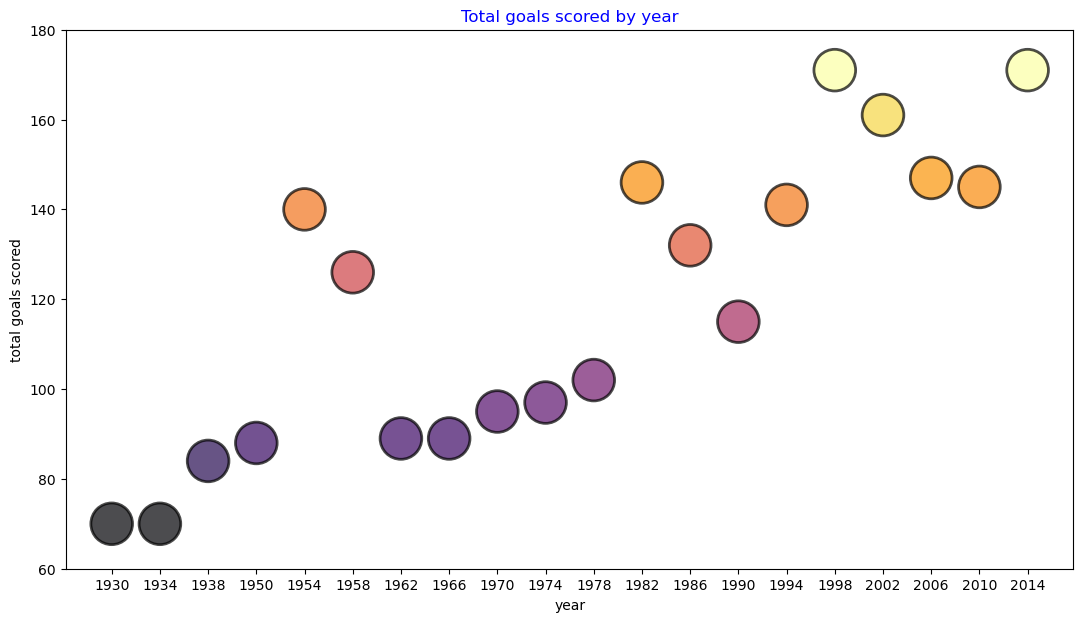

In [74]:
plt.figure(figsize=(13,7))
Cups["Year1"] = Cups["Year"].astype(str)
ax = plt.scatter("Year1","GoalsScored",data=Cups,
            c=Cups["GoalsScored"],cmap="inferno",
            s=900,alpha=.7,
            linewidth=2,edgecolor="k")

#plt.colorbar()
plt.xticks(Cups["Year1"].unique())
plt.yticks(np.arange(60,200,20))
plt.title('Total goals scored by year',color='b')
plt.xlabel("year")
plt.ylabel("total goals scored")
plt.show()

* Here we can see the total goals scored by year 

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0ab6fa">6.2 Total matches played and qualified teams by year

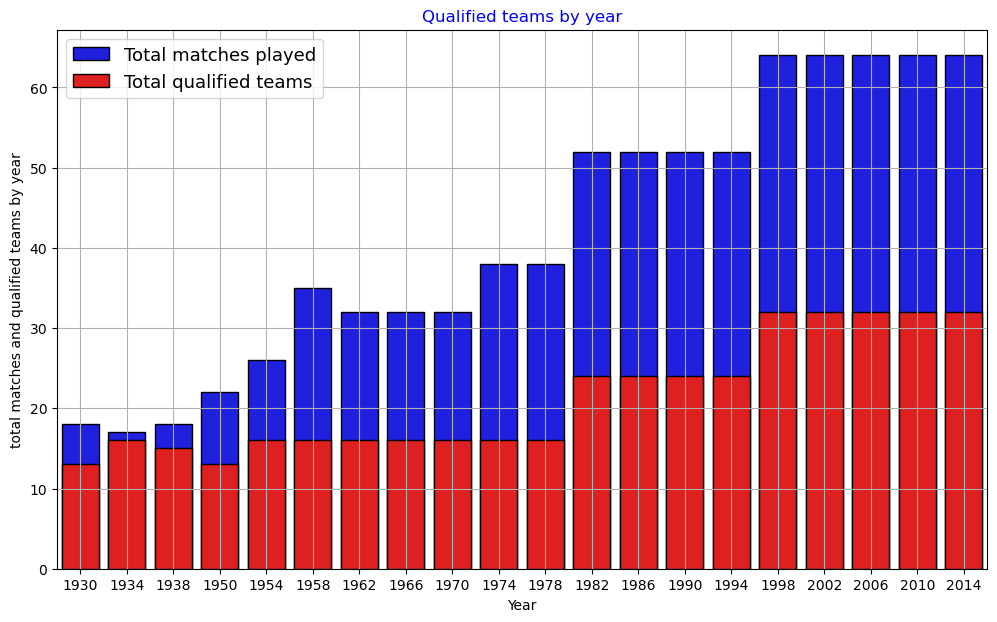

In [89]:
plt.figure(figsize=(12,7))

sns.barplot(x= Cups["Year"], y= Cups["MatchesPlayed"], linewidth=1, edgecolor=[c for c in "k"*len(Cups)], color="b", label="Total matches played")

sns.barplot(x= Cups["Year"], y= Cups["QualifiedTeams"],linewidth=1,
            edgecolor=[c for c in "k"*len(Cups)],color="r",label="Total qualified teams")


plt.legend(loc="best",prop={"size":13})
plt.title("Qualified teams by year",color='b')
plt.grid(True)
plt.ylabel("total matches and qualified teams by year")
plt.show()

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0ab6fa">6.3.Matches with highest number of attendance

In [ ]:
Matches.dropna().head(2)

In [97]:
h_att = Matches.sort_values(by="Attendance",ascending=False)[:10]   #sort and select first 10 rows
h_att = h_att[['Year', 'Datetime','Stadium', 'City', 'HomeTeamName',
              'HomeTeamGoals', 'AwayTeamGoals', 'AwayTeamName', 'Attendance', 'MatchID']]  # select specific columns
h_att["Stadium"] = h_att["Stadium"].replace('Maracan� - Est�dio Jornalista M�rio Filho',"Maracanã Stadium")  #replacing one stadium
h_att["Datetime"] = h_att["Datetime"].str.split("-").str[0] #converting day time to string
h_att["mt"] = h_att["HomeTeamName"] + " .Vs.  " + h_att["AwayTeamName"] #creating new column 'mt'

h_att

,Year,Datetime,Stadium,City,HomeTeamName,HomeTeamGoals,AwayTeamGoals,AwayTeamName,Attendance,MatchID,mt
74,1950.0,16 Jul 1950,Maracanã Stadium,Rio De Janeiro,Uruguay,2.0,1.0,Brazil,173850.0,1190.0,Uruguay .Vs. Brazil
71,1950.0,13 Jul 1950,Maracanã Stadium,Rio De Janeiro,Brazil,6.0,1.0,Spain,152772.0,1186.0,Brazil .Vs. Spain
63,1950.0,01 Jul 1950,Maracanã Stadium,Rio De Janeiro,Brazil,2.0,0.0,Yugoslavia,142429.0,1191.0,Brazil .Vs. Yugoslavia
70,1950.0,09 Jul 1950,Maracanã Stadium,Rio De Janeiro,Brazil,7.0,1.0,Sweden,138886.0,1189.0,Brazil .Vs. Sweden
379,1986.0,07 Jun 1986,Estadio Azteca,Mexico City,Mexico,1.0,1.0,Paraguay,114600.0,680.0,Mexico .Vs. Paraguay
411,1986.0,29 Jun 1986,Estadio Azteca,Mexico City,Argentina,3.0,2.0,Germany FR,114600.0,393.0,Argentina .Vs. Germany FR
397,1986.0,15 Jun 1986,Estadio Azteca,Mexico City,Mexico,2.0,0.0,Bulgaria,114580.0,463.0,Mexico .Vs. Bulgaria
407,1986.0,22 Jun 1986,Estadio Azteca,Mexico City,Argentina,2.0,1.0,England,114580.0,392.0,Argentina .Vs. England
409,1986.0,25 Jun 1986,Estadio Azteca,Mexico City,Argentina,2.0,0.0,Belgium,114500.0,388.0,Argentina .Vs. Belgium
367,1986.0,03 Jun 1986,Estadio Azteca,Mexico City,Belgium,1.0,2.0,Mexico,110000.0,428.0,Belgium .Vs. Mexico


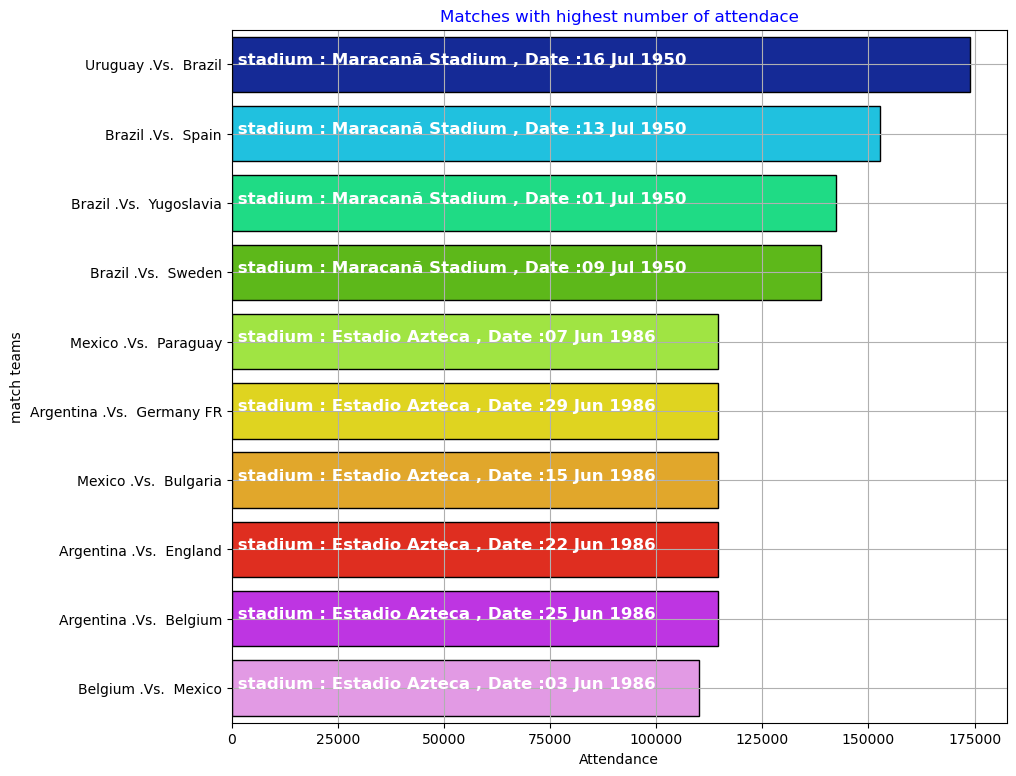

In [98]:
plt.figure(figsize=(10,9))
ax = sns.barplot(y =h_att["mt"],x = h_att["Attendance"],palette="gist_ncar",
                 linewidth = 1,edgecolor=[c for c in "k"*len(h_att)])
plt.ylabel("match teams")
plt.xlabel("Attendance")
plt.title("Matches with highest number of attendace",color='b')
plt.grid(True)
for i,j in enumerate(" stadium : "+h_att["Stadium"]+" , Date :" + h_att["Datetime"]):
    ax.text(.7,i,j,fontsize = 12,color="white",weight = "bold")
plt.show()

* The Stadiums with highest average attendance is city of Uruguay

In [100]:
mat_c = Matches["City"].value_counts().reset_index()
mat_c

,index,City
0,Mexico City,23
1,Montevideo,18
2,Rio De Janeiro,18
3,Guadalajara,17
4,Johannesburg,15
...,...,...
146,Eskilstuna,1
147,Orebro,1
148,Reims,1
149,Antibes,1


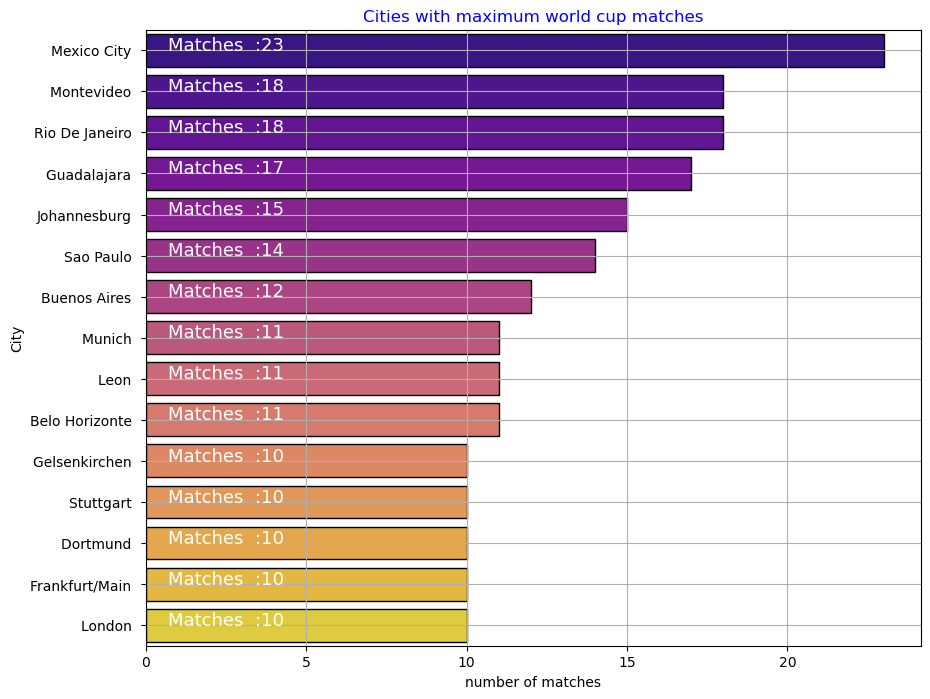

In [101]:
mat_c = Matches["City"].value_counts().reset_index()
plt.figure(figsize=(10,8))
ax = sns.barplot(y=mat_c["index"][:15],x = mat_c["City"][:15],palette="plasma",
                 linewidth=1,edgecolor=[c for c in "k"*15])
plt.xlabel("number of matches")
plt.ylabel("City")
plt.grid(True)
plt.title("Cities with maximum world cup matches",color='b')

for i,j in enumerate("Matches  :" + mat_c["City"][:15].astype(str)):
    ax.text(.7,i,j,fontsize = 13,color="w")
plt.show()

* Cities with maximum world cup matches is 23

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0ab6fa">6.5.Average attendance by city

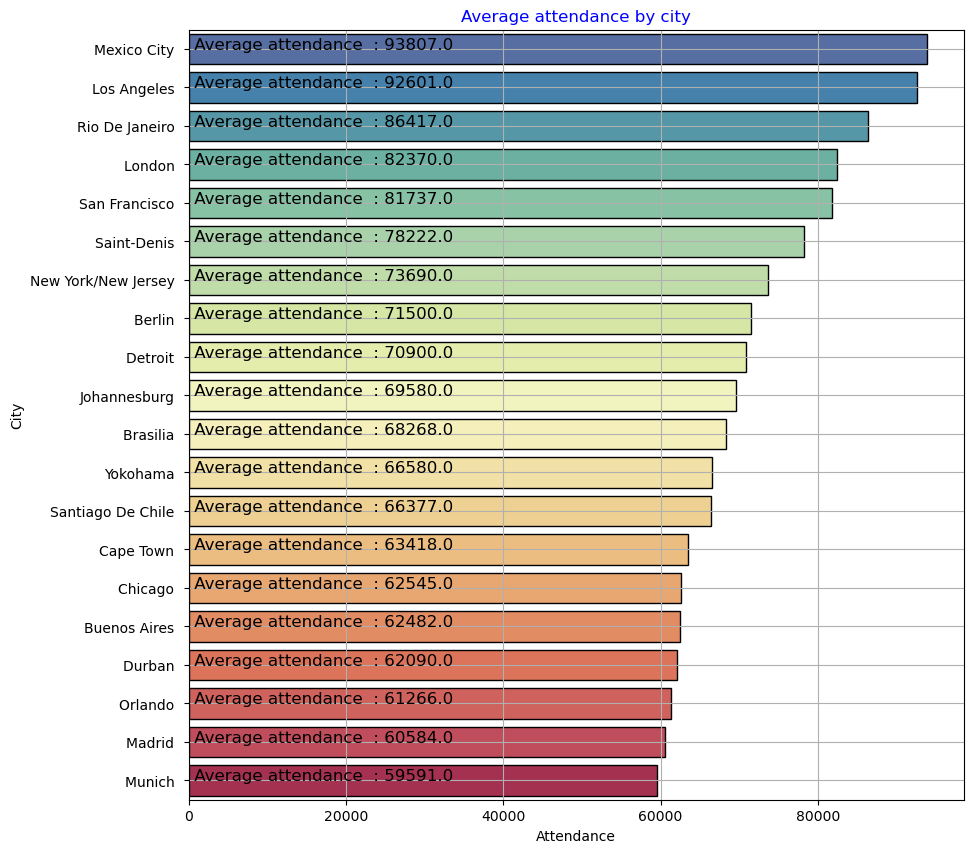

In [119]:
ct_at = Matches.groupby("City")["Attendance"].mean().reset_index()
ct_at = ct_at.sort_values(by="Attendance",ascending=False)
ct_at

plt.figure(figsize=(10,10))

ax = sns.barplot(x="Attendance",y="City",
            data=ct_at[:20],
            linewidth = 1,
            edgecolor = [c for c in "k"*20],
            palette  = "Spectral_r")

for i,j in enumerate(" Average attendance  : "+np.around(ct_at["Attendance"][:20],0).astype(str)):
    ax.text(.7,i,j,fontsize=12)
plt.grid(True)

plt.title("Average attendance by city",color='b')
plt.show()

* Average attendance by city is Mexico city 93807.0

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0ab6fa">6.6.Teams with the most world cup final victories

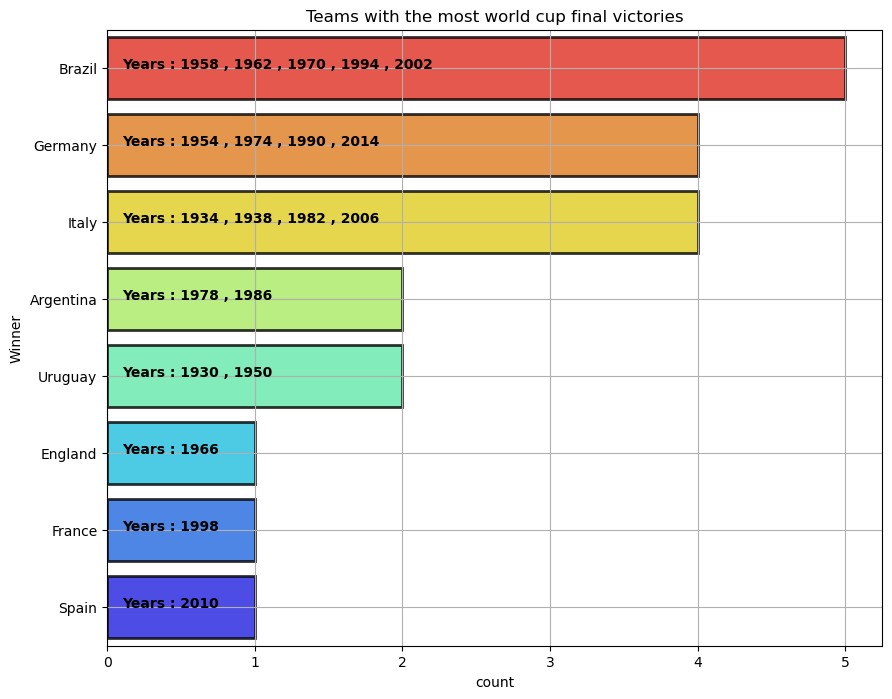

In [128]:
Cups["Winner"]=Cups["Winner"].replace("Germany FR","Germany") #replacing Germany with Germany
Cups["Runners-Up"]=Cups["Runners-Up"].replace("Germany FR","Germany") #replacing Germany with Germany
c1  = Cups.groupby("Winner")["Year1"].apply(" , ".join).reset_index() #grouping by year
c2  = Cups.groupby("Winner")['Year'].count().reset_index() #grouping by year count

c12 = c1.merge(c2,left_on="Winner",right_on="Winner",how="left")
c12 = c12.sort_values(by = "Year",ascending =False)

plt.figure(figsize=(10,8))
ax = sns.barplot(x = "Year", y="Winner",data=c12,
            palette="jet_r",
            alpha=.8,
            linewidth=2,
            edgecolor=[c for c in "k"*len(c12)])
for i,j in enumerate("Years : " + c12["Year1"]):
    ax.text(.1,i,j,weight = "bold")

plt.title("Teams with the most world cup final victories")
plt.grid(True)
plt.xlabel("count")
plt.show()

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0ab6fa">6.7.World cup final results by nation

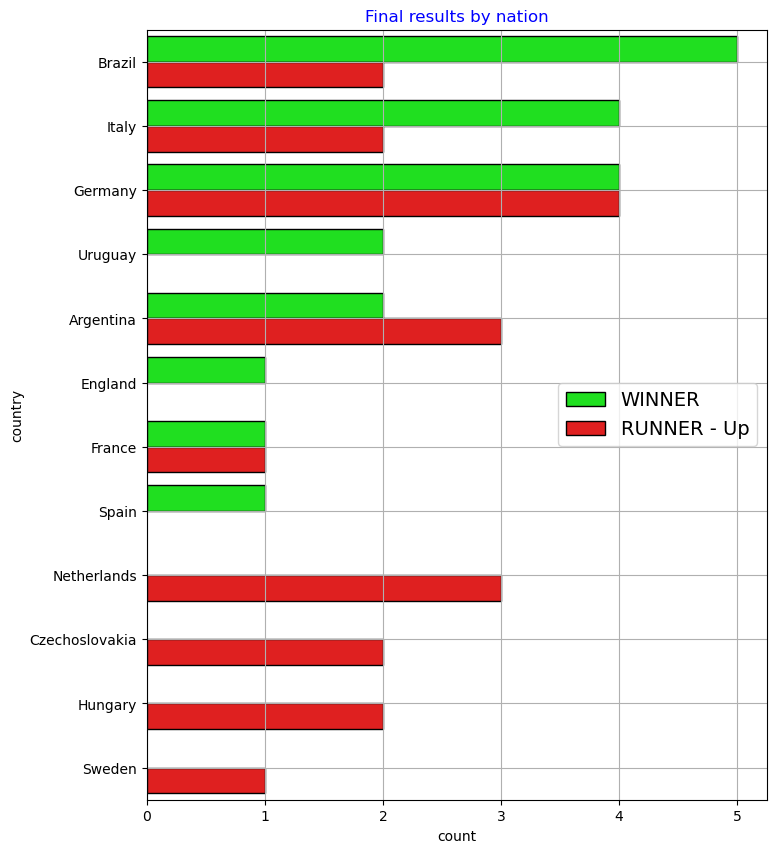

In [155]:
cou = Cups["Winner"].value_counts().reset_index()
cou_w = cou.copy()
cou_w.columns = ["country","count"] #making columns 
cou_w["type"] = "WINNER"  #adding new column type


cou_r = Cups["Runners-Up"].value_counts().reset_index()
cou_r.columns = ["country","count"]
cou_r["type"] = "RUNNER - Up"

cou_t = pd.concat([cou_w,cou_r],axis=0)

plt.figure(figsize=(8,10))
sns.barplot(x="count", y="country",data=cou_t,
            hue="type",palette=["lime","r"],
            linewidth=1,edgecolor=[c for c in "k"*len(cou_t)])
plt.grid(True)
plt.legend(loc="center right",prop={"size":14})
plt.title("Final results by nation",color='b')
plt.show()

In [163]:
def label(matches):
    if Matches["HomeTeamGoals"] > Matches["AwayTeamGoals"]:
        return "Home team win"
    if Matches["AwayTeamGoals"] > Matches["HomeTeamGoals"]:
        return "Away team win"
    if Matches["HomeTeamGoals"] == Matches["AwayTeamGoals"]:
        return "DRAW"
Matches["outcome"] = Matches.apply(lambda matches:label(matches),axis=1)

plt.figure(figsize=(9,9))
matches["outcome"].value_counts().plot.pie(autopct="%1.0f%%",fontsize =14,
                                           colors = sns.color_palette("husl"),
                                           wedgeprops={"linewidth":2,"edgecolor":"white"},
                                           shadow=True)
circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)
plt.title("# Match outcomes by home and away teams",color='b')
plt.show()
